#**G935 Comercio Internacional**

##**Comercio y tecnología: el modelo Ricardiano**







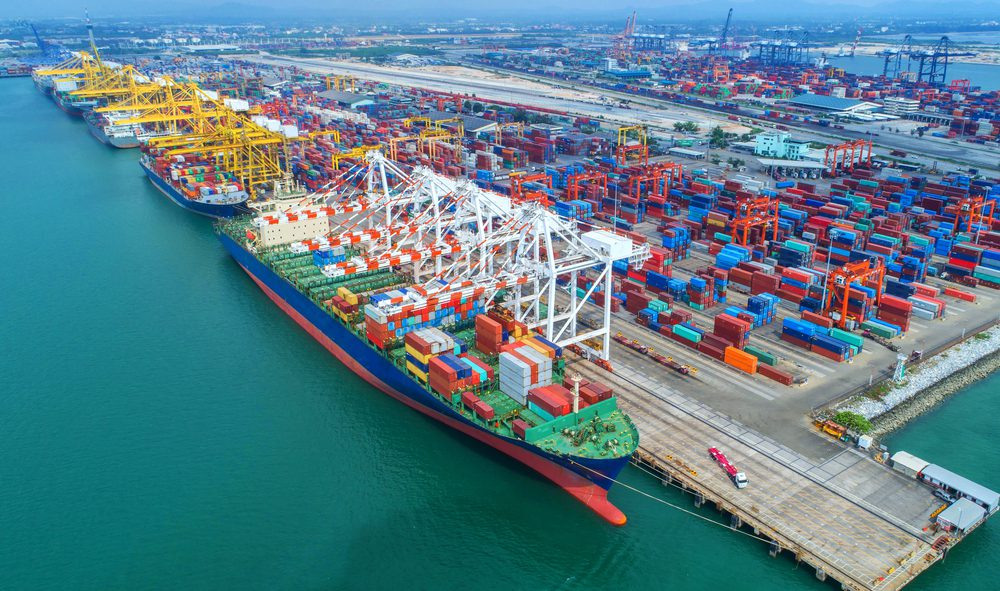

##Ventaja comparativa y costes de oportunidad

Suponemos una economía que solo tiene un factor productivo
(trabajo) para producir dos bienes, aceite o cereales.

La tecnología de producción de ambos países se puede capturar a partir de la productividad del trabajo en cada sector, o bien a partir de los requerimientos unitarios de trabajo, el número de horas que se necesitan para producir un litro de aceite o un l kilogramo de cereales.

|horas por unidad | China | EEUU |
|-----------|-------------|--------|
|Aceite  | $a_O^{{Ch}}$ = 10 horas/l |$a_O^{{US}}$ = 3 horas/l|
|Cereales|$a_C^{{Ch}}$ = 2 hours/kg |$a_C^{{US}}$ = 1 hora/kg |


Los requerimientos unitarios de trabajo son inversamente proporcionales a la productividad del trabajo.

Consideramos la oferta de trabajo como fija en cada país. En los EEUU es de
$L^{{US}}$ =300 horas, mientras que en China $L^{{Ch}}$ =1000 horas.

##Frontera de posibilidades de producción
Calculamos la frontera de posibilidades de producción (FPP) en cada país. Por ejemplo, en los EEUU:

$$a_C^{{US}}Q_C^{{US}}+a_O^{{US}}Q_O^{{US}}\leq L^{{US}}$$

En el modelo Ricardiano se considera el supuesto de pleno empleo, por tanto, la frontera de posibilidades de producción es una línea recta.

$$a_C^{{US}}Q_C^{{US}}+a_O^{{US}}Q_O^{{US}} = L^{{US}}$$

Si se expresa la FPP en función de la producción de cereales:

$$Q_C^{{US}}=\frac{L^{{US}}}{a_C^{{US}}}-\frac{a_O^{{US}}}{a_C^{{US}}}Q_O^{{US}}$$

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, VBox, HBox, Label
from IPython.display import display
from ipywidgets import HTMLMath # Import HTMLMath

# Constantess
a_O_US = 3.0  # Requerimiento unitario aceite (fijo)

# Slider default values
L_US_initial = 300.0
a_C_US_initial = 1.0

# Axis limits
MAX_L_US = 300
MIN_a_C_US = 0.5
MAX_Q_C_US_fixed = MAX_L_US / MIN_a_C_US
MAX_Q_O_US_fixed = MAX_L_US / a_O_US

def plot_ppf_us(L_US, a_C_US):
    # Calculate maximum feasible copper production given labor
    max_Q_O = L_US / a_O_US
    Q_O_US_values = np.linspace(0, max_Q_O, 100)
    Q_C_US_values = (L_US / a_C_US) - (a_O_US / a_C_US) * Q_O_US_values

    plt.figure(figsize=(8, 6))
    plt.plot(Q_O_US_values, Q_C_US_values, label='FPP US', color='blue')
    plt.xlabel('$Q_O^{US}$, aceite (l)')
    plt.ylabel('$Q_C^{US}$, cereales (kg)')
    plt.title('Frontera de posibilidades de producción de US (FPP)')
    plt.grid(True)
    plt.xlim(0, MAX_Q_O_US_fixed)
    plt.ylim(0, MAX_Q_C_US_fixed)
    plt.legend()
    plt.show()


# Create sliders
L_US_slider = FloatSlider(min=100, max=1000, step=10, value=L_US_initial)
a_C_US_slider = FloatSlider(min=0.5, max=5, step=0.1, value=a_C_US_initial)

# Create HTMLMath labels for descriptions
L_US_label = HTMLMath(value=r"$L^{US}$")
a_C_US_label = HTMLMath(value=r"$a_C^{US}$")

# Arrange labels and sliders using HBox and VBox
L_US_widget = HBox([L_US_label, L_US_slider])
a_C_US_widget = HBox([a_C_US_label, a_C_US_slider])

# Use interact with the sliders
interact(plot_ppf_us,
         L_US=L_US_slider,
         a_C_US=a_C_US_slider
        );

# Display the widgets separately if needed, but interact handles displaying the output of the function
# display(VBox([L_US_widget, a_C_US_widget]))

interactive(children=(FloatSlider(value=300.0, description='L_US', max=1000.0, min=100.0, step=10.0), FloatSli…

##Decisión de consumo bajo autarquía
El problema de decisión de un consumidor representativo bajo autarquía en US es como sigue
\begin{align*}
    \max_{D_O^{US}, D_C^{US}} \quad & U\left(D_O^{US}, D_C^{US}\right) \\
    \text{s.t.} \quad & a_C^{US} Q_C^{US} + a_O^{US} Q_O^{US} = L^{US} \\
    & \left(\frac{p_O^{US}}{p_C^{US}}\right)^A = \frac{a_O^{US}}{a_C^{US}} \\
    & D_O^{US} = Q_O^{US} \\
    & D_C^{US} = Q_C^{US}
\end{align*}
La condición de equilibrio en US bajo autarquía es
\begin{align*}
RMS_{D_O^{US}}^{D_C^{US}}(\cdot) = \left( \frac{p_O^{US}}{p_C^{US}} \right)^A
\end{align*}

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

# Parámetros fijos
a_O_US = 3.0  # Requerimientos unitarios de aceite
alpha = 0.45   # Cobb-Douglas preference parameter (porcentaje de gasto en aceite)
MAX_L_US = 300
MIN_a_C_US = 0.5
MAX_Q_C_US_fixed = MAX_L_US / MIN_a_C_US
MAX_Q_O_US_fixed = MAX_L_US / a_O_US

def utility(O, C, alpha):
    return O**alpha * C**(1 - alpha)

def plot_ppf_and_indifference(L_US, a_C_US):
    # Maximum feasible production values (autarky)
    max_Q_O = L_US / a_O_US
    max_Q_C = L_US / a_C_US

    # Autarky PPF
    Q_O_values = np.linspace(0, max_Q_O, 300)
    Q_C_values = (L_US - a_O_US * Q_O_values) / a_C_US
    Q_C_values = np.maximum(Q_C_values, 0)

    # Autarky optimal point (where TMS = MRT)
    O_opt_autarky = (alpha * L_US) / a_O_US
    C_opt_autarky = ((1 - alpha) * L_US) / a_C_US
    U_opt_autarky = utility(O_opt_autarky, C_opt_autarky, alpha)

    # Indifference curves
    O = np.linspace(0.1, MAX_Q_O_US_fixed, 300)
    C = np.linspace(0.1, MAX_Q_C_US_fixed, 300)
    O_grid, C_grid = np.meshgrid(O, C)
    U = utility(O_grid, C_grid, alpha)

    # Plotting
    plt.figure(figsize=(8, 6))

    # PPF
    plt.plot(Q_O_values, Q_C_values, label='$FPP^{US}$', color='blue')

    # Indifference curves
    contour_levels = [U_opt_autarky * 0.8, U_opt_autarky, U_opt_autarky * 1.2]
    CS = plt.contour(O_grid, C_grid, U, levels=contour_levels, colors=['gray', 'green', 'gray'], linestyles=['--', '-', '--'])
    plt.clabel(CS, inline=True, fontsize=8)

    # Optimal point
    plt.plot(O_opt_autarky, C_opt_autarky, 'ro', label='Elección óptima')

    # Graph settings
    plt.xlabel('$Q_O^{US}$, $D_O^{US}$, aceite (l)')
    plt.ylabel('$Q_C^{US}$, $D_C^{US}$, cereales (kg)')
    plt.title('FPP de US y curvas de indiferencia Cobb-Douglas bajo autarquía')
    plt.grid(True)
    plt.xlim(0, MAX_Q_O_US_fixed)
    plt.ylim(0, MAX_Q_C_US_fixed)
    plt.legend()
    plt.show()

# Interactive slidersl
interact(plot_ppf_and_indifference,
         L_US=FloatSlider(min=100, max=1000, step=10, value=300, description='L^US'),
         a_C_US=FloatSlider(min=0.5, max=5, step=0.1, value=1.0, description='a_C^US'),
         alpha=FloatSlider(min=0.1, max=0.9, step=0.1, value=0.45, description='alfa')
        );

interactive(children=(FloatSlider(value=300.0, description='L^US', max=1000.0, min=100.0, step=10.0), FloatSli…

##Problema de decisión del consumidor representativo bajo la liberalización de comercio:
\begin{align}
\max_{D_O^{US}, D_C^{US}} \quad & U(D_O^{US}, D_C^{US}) \\
\text{s.t.} \quad & p_O^{US}(D_O^{US} - Q_O^{US}) + p_C^{US}(D_C^{US} - Q_C^{US}) = 0 \\
& \frac{p_O^{US}}{p_C^{US}} = \left(\frac{p_O}{p_C}\right)^T \\
& Q_O^{US} = \frac{L^{US}}{a_O^{US}} \\
& Q_C^{US} = 0
\end{align}
Podemos analizar las restricciones del problema de decisión de consumo:
*   La restricción (1) muestra la condición de saldo comercial nulo.
*   La restricción (2) señala que el precio relativo del aceite en US es idéntico al precio relativo en China después de la liberalización del comercio.
*  Las restricciones (3) y (4) muestran la especialización productiva completa de US en la producción de aceite.

La condición de equilibrio de US bajo la liberalización comercial es
\begin{align*}
RMS_{D_O^{US}}^{D_C^{US}}(\cdot) = \left( \frac{p_O^{US}}{p_C^{US}} \right)^T
\end{align*}



In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

# Fixed parameters
a_O_US = 3.0  # Unit labor requirement for aceite
alpha = 0.45   # Cobb-Douglas preference parameter (share of aceite)
MAX_L_US = 300
MIN_a_C_US = 0.5
MAX_Q_C_US_fixed = MAX_L_US / MIN_a_C_US
MAX_Q_O_US_fixed = MAX_L_US / a_O_US

# Free trade parameters
p_rel = 4.0909  # Relative price of aceite in terms of cereales (P_O/P_C)

def utility(O, C, alpha):
    return O**alpha * C**(1 - alpha)

def plot_ppf_and_indifference(L_US, a_C_US):
    # Maximum feasible production values (autarky)
    max_Q_O = L_US / a_O_US
    max_Q_C = L_US / a_C_US

    # Autarky PPF
    Q_O_values = np.linspace(0, max_Q_O, 300)
    Q_C_values = (L_US - a_O_US * Q_O_values) / a_C_US
    Q_C_values = np.maximum(Q_C_values, 0)

    # Autarky optimal point (where TMS = MRT)
    O_opt_autarky = (alpha * L_US) / a_O_US
    C_opt_autarky = ((1 - alpha) * L_US) / a_C_US
    U_opt_autarky = utility(O_opt_autarky, C_opt_autarky, alpha)

    # Free trade: Complete specialization in aceite
    Q_O_specialized = L_US / a_O_US  # All labor goes to aceite production
    Q_C_specialized = 0  # No cereales production

    # Consumer Possibility Frontier (CPF) under free trade
    # If US produces Q_C_specialized aceite, it can trade at relative price p_rel
    # Maximum cereales obtainable by trading all copper: Q_O_specialized * p_rel
    max_C_trade = Q_O_specialized * p_rel

    # CPF: O + C/p_rel = Q_O_specialized
    # Rearranging: C = p_rel * (Q_O_specialized - O)
    O_trade_values = np.linspace(0, Q_O_specialized, 300)
    C_trade_values = p_rel * (Q_O_specialized - O_trade_values)

    # Free trade optimal consumption (where TMS = p_rel)
    # TMS = (alpha * C) / ((1-alpha) * O) = p_rel
    # With budget constraint: O + C/p_rel = Q_O_specialized
    O_opt_trade = alpha * Q_O_specialized
    C_opt_trade = (1 - alpha) * Q_O_specialized * p_rel
    U_opt_trade = utility(O_opt_trade, C_opt_trade, alpha)

    # Indifference curves
    O = np.linspace(0.1, max(MAX_Q_O_US_fixed, Q_O_specialized) * 1.1, 300)
    C = np.linspace(0.1, max(MAX_Q_C_US_fixed, max_C_trade) * 1.1, 300)
    O_grid, C_grid = np.meshgrid(O, C)
    U = utility(O_grid, C_grid, alpha)

    # Plotting
    plt.figure(figsize=(8, 6))

    # Autarky PPF
    plt.plot(Q_O_values, Q_C_values, color='blue', linewidth=2)

    # Free trade CPF
    plt.plot(O_trade_values, C_trade_values, color='red', linewidth=2)

    # Production point under specialization
    plt.plot(Q_O_specialized, Q_C_specialized, 'rs', markersize=8,
             label='Producción bajo especialización')

    # Indifference curves
    contour_levels = [U_opt_autarky * 0.8, U_opt_autarky, U_opt_trade, U_opt_trade * 1.1]
    CS = plt.contour(O_grid, C_grid, U, levels=contour_levels,
                     colors=['lightgray', 'green', 'green', 'lightgray'],
                     linestyles=['--', '-', '-', '--'])
    plt.clabel(CS, inline=True, fontsize=8)

    # Optimal points
    plt.plot(O_opt_autarky, C_opt_autarky, 'bo', markersize=8, label='Equilibrio autarquía')
    plt.plot(O_opt_trade, C_opt_trade, 'ro', markersize=8, label='Equilibrio libre comercio')

    # Graph settings
    plt.xlabel('$Q_O^{US}$,$D_O^{US}$, aceite (l)')
    plt.ylabel('$Q_C^{US}$,$D_C^{US}$, cereales (kg)')
    plt.title(f'FPP vs FPC en US: Autarquía vs Libre comercio\n(Precio relativo = {p_rel}, Especialización completa en aceite)')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max(MAX_Q_O_US_fixed, Q_O_specialized) * 1.1)
    plt.ylim(0, max(MAX_Q_C_US_fixed, max_C_trade) * 1.1)
    plt.legend(loc='upper right')


    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\n=== RESUMEN ===")
    print(f"Oferta de trabajo: {L_US} horas")
    print(f"Requerimiento unitario de cereales: {a_C_US}")
    print(f"Precio relativo (P_O/P_C): {p_rel}")
    print(f"\nAUTARQUÍA:")
    print(f"  Aceite: {O_opt_autarky:.2f} l")
    print(f"  Cereales: {C_opt_autarky:.2f} kg")
    print(f"  Utilidad: {U_opt_autarky:.2f}")
    print(f"\nLIBRE COMERCIO (Especialización completa):")
    print(f"  Producción - Aceite: {Q_O_specialized:.2f} l, Cereales: {Q_C_specialized:.2f} kg")
    print(f"  Consumo - Aceite: {O_opt_trade:.2f} l, Cereales: {C_opt_trade:.2f} kg")
    print(f"  Comercio internacional - Exportaciones de aceite: ({Q_O_specialized - O_opt_trade:.2f}) l, Importacioness of cereales: ({C_opt_trade - Q_C_specialized:.2f}) kg")
    print(f"  Utilidad: {U_opt_trade:.2f}")

# Interactive sliders
interact(plot_ppf_and_indifference,
         L_US=FloatSlider(min=100, max=1000, step=10, value=300, description='L^US'),
         a_C_US=FloatSlider(min=0.5, max=5, step=0.1, value=1.0, description='a_C^US')
        );

interactive(children=(FloatSlider(value=300.0, description='L^US', max=1000.0, min=100.0, step=10.0), FloatSli…

In [ ]:
# @title Curva de oferta relativa mundial
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np

def plot_RS(L_USA, a_LO_CHN):
    # Fixed labor supply
    L_CHN = 1000

    # Fixed unit labor requirements (except a_LC_CHN)
    a_LO_USA = 3
    a_LC_USA = 1
    a_LC_CHN = 2
    a_LG_USA = 1 # Added missing variable definition
    a_LG_CHN = 2 # Added missing variable definition


    # Compute autarky prices (opportunity costs)
    autarky_price_USA = a_LO_USA / a_LC_USA  # = 3
    autarky_price_CHN = a_LO_CHN / a_LC_CHN  # variable

    # Outputs under specialization
    Q_O_USA = L_USA / a_LO_USA
    Q_C_CHN = L_CHN / a_LC_CHN
    Q_O_CHN = L_CHN / a_LO_CHN
    Q_C_USA = L_USA / a_LC_USA

    # Relative supplies
    RS_mid = Q_O_USA / Q_C_CHN
    RS_max = (Q_O_USA + Q_O_CHN) / Q_C_USA

    # Plot
    plt.figure(figsize=(8, 6))

    # RS Curve
    plt.plot([0, RS_mid], [autarky_price_USA, autarky_price_USA], 'b--', label='Especialización completa en China')
    plt.plot([RS_mid, RS_mid], [autarky_price_USA, autarky_price_CHN], 'g', label='Especialización completa en ambos países')
    plt.plot([RS_mid, RS_max], [autarky_price_CHN, autarky_price_CHN], 'r--', label='Especialización completa en US')

    # Autarky price lines
    plt.axhline(autarky_price_USA, color='gray', linestyle=':', label='Precio de autarquía en US')
    plt.axhline(autarky_price_CHN, color='black', linestyle=':', label='Precio de autarquía en China')

    # Labels and formatting
    plt.xlabel('($Q_O^{US}$+$Q_O^{Ch}$ / $Q_C^{US}$+$Q_C^{Ch}$)', fontsize=12)
    plt.ylabel('($P_O$ / $P_C$)', fontsize=12)
    plt.title(f'Curva de oferta relativa mundial\nL^US = {L_USA}, a_O^Ch = {a_LO_CHN}', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.xlim(0, max(RS_max + 0.1, 1))
    plt.ylim(0, max(autarky_price_CHN + 1, 6))
    plt.show()


# Interactive sliders
interact(
    plot_RS,
    L_USA=FloatSlider(value=300, min=50, max=600, step=10, description='L^US'),
    a_LO_CHN=FloatSlider(value=10, min=7, max=20, step=0.5, description='a_O^Ch') # Corrected slider argument
);

interactive(children=(FloatSlider(value=300.0, description='L^US', max=600.0, min=50.0, step=10.0), FloatSlide…

In [ ]:
# @title Precio relativo de equilibrio bajo libre comercio: oferta y demanda relativa mundial
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np
from scipy.optimize import root_scalar

def plot_RS_RD_prefs(L_USA, a_LO_CHN, alpha):
    # Fixed labor supply
    L_CHN = 1000

    # Fixed unit labor requirements
    a_LO_USA = 3
    a_LC_USA = 1
    a_LC_CHN = 2

    # Specialization outputs
    Q_O_USA = L_USA / a_LO_USA
    Q_C_USA = L_USA / a_LC_USA
    Q_O_CHN = L_CHN / a_LO_CHN
    Q_C_CHN = L_CHN / a_LC_CHN

    # RS segments
    RS_mid = Q_O_USA / Q_C_CHN
    RS_max = (Q_O_USA + Q_O_CHN) / Q_C_USA

    # Autarky prices
    autarky_price_USA = a_LO_USA / a_LC_USA
    autarky_price_CHN = a_LO_CHN / a_LC_CHN

    # Price range for RD curve
    p_vals = np.linspace(0.1, max(autarky_price_USA, autarky_price_CHN) * 2, 300)
    RD_vals = []

    for p in p_vals:
        # Incomes
        Y_USA = Q_O_USA * p + Q_C_USA
        Y_CHN = Q_O_CHN * p + Q_C_CHN

        # Cobb-Douglas demand with α
        D_O_USA = alpha * Y_USA / p
        D_C_USA = (1 - alpha) * Y_USA / 1

        D_O_CHN = alpha * Y_CHN / p
        D_C_CHN = (1 - alpha) * Y_CHN / 1

        # Avoid division by zero if D_C_USA + D_C_CHN is zero
        if (D_C_USA + D_C_CHN) == 0:
            RD = np.inf # Or a very large number
        else:
            RD = (D_O_USA + D_O_CHN) / (D_C_USA + D_C_CHN)
        RD_vals.append(RD)

    # Find equilibrium: RD(p) = RS_mid
    def RD_func(p):
        Y_USA = Q_O_USA * p + Q_C_USA
        Y_CHN = Q_O_CHN * p + Q_C_CHN
        D_O = alpha * (Y_USA + Y_CHN) / p
        D_C = (1 - alpha) * (Y_USA + Y_CHN)
        # Avoid division by zero
        if D_C == 0:
          return np.inf
        return D_O / D_C

    p_star = None
    try:
        # Adjust bracket to a wider range
        bracket_min = 0.1
        bracket_max = 10.0
        sol = root_scalar(lambda p: RD_func(p) - RS_mid, bracket=[bracket_min, bracket_max], method='bisect')
        p_star = sol.root if sol.converged else None
    except Exception as e:
        print(f"Could not find equilibrium price: {e}")
        p_star = None

    # Calculate relative wage
    relative_wage = None
    if p_star and min(autarky_price_USA, autarky_price_CHN) < p_star < max(autarky_price_USA, autarky_price_CHN):
        # Relative wage = (P_O / P_C)_equilibrium * (a_LC_CHN / a_LO_USA)
        relative_wage = p_star * (a_LC_CHN / a_LO_USA)


    # Plotting
    plt.figure(figsize=(8, 6))

    # RS curve
    plt.plot([0, RS_mid], [autarky_price_USA, autarky_price_USA], 'b--', label='Especialización completa en China')
    plt.plot([RS_mid, RS_mid], [autarky_price_USA, autarky_price_CHN], 'g', label='Especialización completa en ambos países')
    plt.plot( [RS_mid, RS_max], [autarky_price_CHN, autarky_price_CHN], 'r--', label='Especialización completa en US')

    # RD curve
    plt.plot(RD_vals, p_vals, 'm-', linewidth=2, label=f'RD (α = {alpha:.2f})')

    # Autarky price lines
    plt.axhline(autarky_price_USA, color='gray', linestyle=':', label='Precio de autarquía de US')
    plt.axhline(autarky_price_CHN, color='black', linestyle=':', label='Precio de autarquía de China')

    # Equilibrium point
    if p_star and 3 <= p_star <= 5:
        RD_star = RD_func(p_star)
        plt.plot(RD_star, p_star, 'ko', markersize=8, label=f'Precio de equilibrio (p* = {p_star:.2f})')

    # Labels
    plt.xlabel('($Q_O^{US}$+$Q_O^{Ch}$/$Q_C^{US}$+$Q_C^{Ch}$), ($D_O^{US}$+$D_O^{Ch}$/$D_C^{US}$+$D_C^{Ch}$)', fontsize=12)
    plt.ylabel('($P_O$ / $P_C$)', fontsize=12)
    plt.title(f'Curvas de demanda y oferta relativa mundial\nL^US = {L_USA}, a_O^Ch = {a_LO_CHN}, α = {alpha:.2f}', fontsize=14)
    plt.grid(True)
    plt.xlim(0, 1) # Set x-axis limit to 1
    plt.ylim(0, max(autarky_price_USA, autarky_price_CHN, p_star if p_star else 0) * 1.5) # Adjust ylim to fit equilibrium price
    plt.legend()
    plt.show()

    # Print summary
    print(f"\n=== RESUMEN ===")
    print(f"Oferta de trabajo en US: {L_USA} horas")
    print(f"Requerimiento unitario de aceite en China: {a_LO_CHN} horas/l")
    print(f"Preferencias (α): {alpha:.2f}")
    if p_star and min(autarky_price_USA, autarky_price_CHN) < p_star < max(autarky_price_USA, autarky_price_CHN):
        print(f"Precio relativo de equilibrio (P_O/P_C)*: {p_star:.2f}")
    else:
        print("No se encontró precio de equilibrio dentro del rango de precios de autarquía.")

    if relative_wage is not None:
        print(f"Salario relativo de US (w_US/w_Ch): {relative_wage:.2f}")
    else:
        print("No se pudo calcular el salario relativo.")


# Interactive sliders
interact(
    plot_RS_RD_prefs,
    L_USA=FloatSlider(value=300, min=50, max=600, step=10, description='L^US'),
    a_LO_CHN=FloatSlider(value=10, min=7, max=20, step=0.5, description='a_O^Ch'),
    alpha=FloatSlider(value=0.45, min=0.1, max=0.9, step=0.01, description='α')
);

interactive(children=(FloatSlider(value=300.0, description='L^US', max=600.0, min=50.0, step=10.0), FloatSlide…